In [5]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns



In [6]:
#Load the data
df = pd.read_csv('D:\DS tasks\DS Task Predictive modles\DS_Task_7_Predictive_Modle_Weather_Prediction\Sample dataset weather\seattle-weather.csv')




In [7]:
#View the data
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


###### Variable names:can check the column names to understand the available features or variables in the dataset.
###### Data types:4 Continuous Variables.(that can take on any value within a range)-can check the Dtype of each column,such as numeric(continous,discrete),categorical.
###### 1 Variable: Date.
###### 1 Variable refers the Weather.
###### Data format: An initial glance can give you an idea of how the data is structured, whether it's in tabular form or has a specific format like time series data.


In [8]:
#Check the Shape of Dataset
df.shape

(1461, 6)

###### There are 1461 rows (no of observations) and 6 columns (no of vaiables) in this dataset.

##### If the dataset has a large number of rows, it may require additional computational resources or specialized techniques to handle the data efficiently.
##### If the dataset has a large number of columns, it may be necessary to apply dimensionality reduction techniques to reduce the number of variables or focus on specific subsets of features.

In [9]:
#Check unique values of weather column
df['weather'].unique()


array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

###### The output shows that the 'weather' column has five unique values: 'drizzle', 'rain', 'sun', and 'snow','fog'. This information can help us to understand the different weather conditions recorded in the taken dataset.

###### By knowing the unique values, we can perform various data manipulations and analyses, such as grouping the data based on weather conditions, visualizing the distribution of each weather category, or even transforming the column into a categorical variable with specific labels.


 

In [10]:
#Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


###### Here we can see that the Dtype of 'date' is object. To fit it into the machine learning model We need to convert we need to convert the Dtype on 'date' from object to datetime.

###### The column weather contains the data value in the string form and we need to predict the weather data, so we convert it to an integer as label.

In [11]:
#convert Dtype of 'date'

df['date'] = pd.to_datetime(df['date'])



In [12]:
#Describe the data

df.describe()

,date,precipitation,temp_max,temp_min,wind
count,1461,1461.000000,1461.000000,1461.000000,1461.000000
mean,2013-12-31 00:00:00,3.029432,16.439083,8.234771,3.241136
min,2012-01-01 00:00:00,0.000000,-1.600000,-7.100000,0.400000
25%,2012-12-31 00:00:00,0.000000,10.600000,4.400000,2.200000
50%,2013-12-31 00:00:00,0.000000,15.600000,8.300000,3.000000
75%,2014-12-31 00:00:00,2.800000,22.200000,12.200000,4.000000
max,2015-12-31 00:00:00,55.900000,35.600000,18.300000,9.500000
std,NaN,6.680194,7.349758,5.023004,1.437825


Summary Statistics: df.describe() generates summary statistics for each numeric column in the DataFrame, including count, mean, standard deviation, minimum, quartiles (25th, 50th, and 75th percentiles), and maximum values. These statistics offer a quick overview of the distribution and range of the data, allowing you to understand the central tendencies and variability.

Data Validation: By inspecting the count, we can identify missing values or inconsistencies in the dataset. If the count does not match the expected number of observations, it indicates the presence of missing data that needs to be addressed. Additionally, you can verify if the minimum and maximum values fall within the expected ranges for each column, which helps identify potential data entry errors or outliers.


In [13]:
#Find the duplicates

df.duplicated().sum()

0

In [14]:
#Find null values

df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

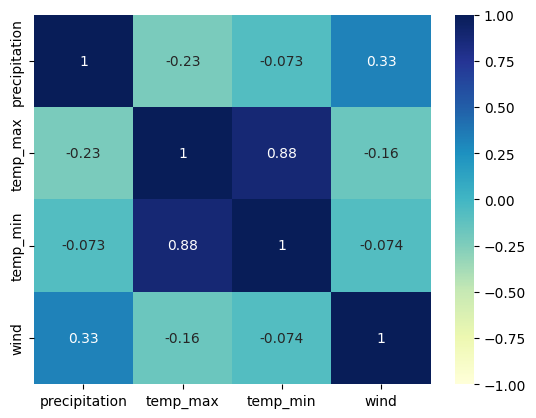

In [15]:
import seaborn as sns
corr_matrix = df.iloc[:,1:5].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

###### In here We can see that wind and precipitation are weakly postively corelated (0.33). On the other hand, temp_max and precipitation are negatively correlated (-0.23)means they move in the opposite direction, similar with temp_max and wind.

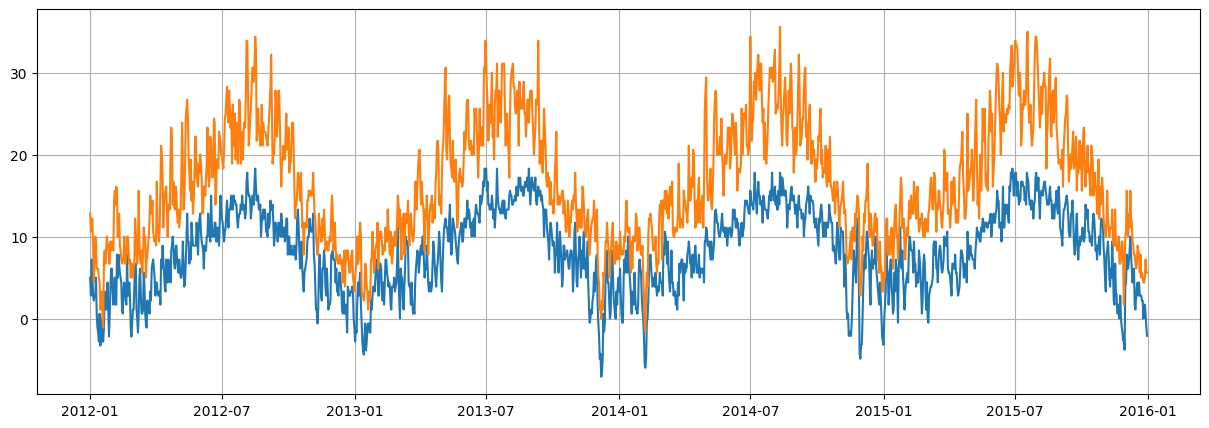

In [16]:
# bar plot of Min and Max Temperature
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 5))
fig = plt.plot(df['date'], df[['temp_min', 'temp_max']])
plt.grid();

###### We can see there is no missing data and outliers. There’s a pattern of the temperature every year 

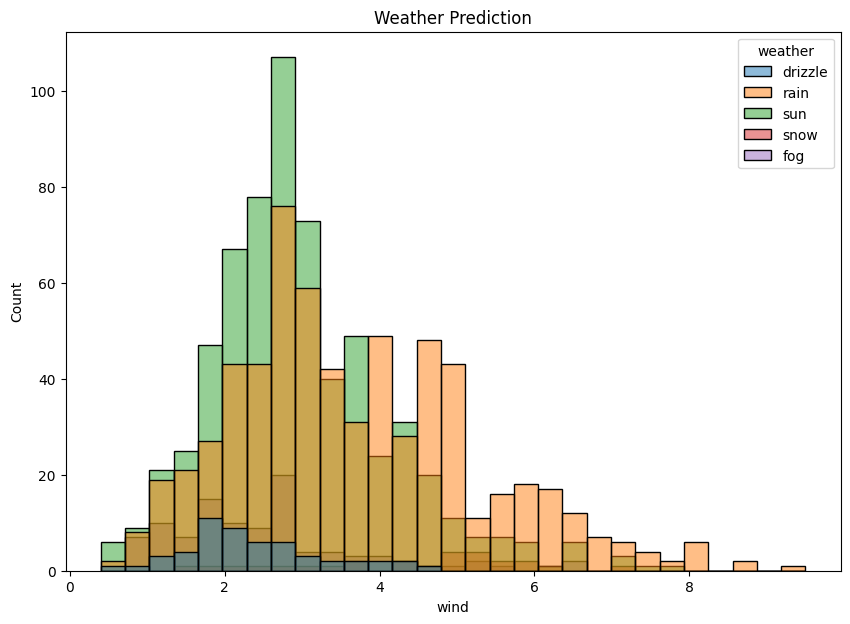

In [17]:
plt.figure(figsize=(10,7))
plt.title('Weather Prediction')
sns.histplot(x='wind',hue='weather',data=df, )
plt.show()

###### Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format. Since the most machine learning algorithms work exclusively with numeric data, we need to encode categorical features into a representation compatible with the models.That is why we using one of the label encoding approach.



In [18]:

# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'weather'.
# Convert Dtype of 'weather' into integer as label 
df['weather']= label_encoder.fit_transform(df['weather']) 


# After converting Dtype of 'weather' check again the unique values
df['weather'].unique() 



array([0, 2, 4, 3, 1])

## Training the Model

Since we are using both input and output data (labelled data) this belongs to "Supervised Machine Learning model" type. Here the "Weather" variable is "Discrete type" the prediction task is "Classification task". In supervised Machine learning there are number of "Classification models".

<ol>
  <li>Logistic Regression</li>
  <li>Support Vector Machines</li>
  <li>Random Forest</li>
  <li>Naive Bayes</li>
  <li>Decision Tree</li>
  <li>K Nearest Neighbour</li>
  <li>Gradient Boost trees (XGBoost)</li>
  <li>Gradient Boosting(AdaBoost)</li>
</ol>


#### Split the Dataset into X and Y

In [19]:
X = df.drop(columns=['date', 'weather'])
Y = df['weather']




#### Spliting data for training and testing

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2, stratify = Y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 4)
(439, 4)
(1022,)
(439,)


### 1.Logistic regression Model

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class (binary classification) classification. 

In [21]:
from sklearn import linear_model

#create Logistic regression body
logr = linear_model.LogisticRegression()

#Train the model usinf .fit method
logr.fit(x_train,y_train)

#print the accuracy

print("Logistic_regression accuracy:{:,.2f}%".format(logr.score(x_test,y_test)*100))

Logistic_regression accuracy:82.46%


c:\Users\kalanis\Anaconda3\envs\Weather_forcast_EDA\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.Support Vector Machine (SVM) Model

In [22]:
from sklearn import svm

In [23]:
#Create a svm Classifier
svm_clf = svm.SVC() 

#Train the model using the training sets
svm_clf.fit(x_train, y_train)

#Predict the response for test dataset
# y_pred = svm_clf.predict(X_test)

print("SVM accuracy:{:,.2f}%".format(svm_clf.score(x_test,y_test)*100))

SVM accuracy:75.40%


### 3.Random Forest

In [24]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [25]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print("Random Forest accuracy:{:,.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest accuracy:82.69%


### 4.Naive Bayes Model

In [26]:
from sklearn.naive_bayes import GaussianNB

# from sklearn.naive_bayes import MultinomialNB

# Build a Gaussian Classifier
nb = GaussianNB()

# nb = MultinomialNB()

# Model training
nb.fit(x_train, y_train)

# Predict Output

print("Naive Bayes accuracy:{:,.2f}%".format(nb.score(x_test,y_test)*100))


Naive Bayes accuracy:82.69%


### 5.Decision Tree model

In [27]:
from sklearn.tree import DecisionTreeClassifier
#Create Decision tree body
Decision_tree = DecisionTreeClassifier()

#Train the model using .fit method
Decision_tree.fit(x_train,y_train)

#print the accuracy

print("Decision_tree accuracy:{:,.2f}%".format(Decision_tree.score(x_test,y_test)*100))

Decision_tree accuracy:75.17%


### 6.K-Nearest Neighbors

###### Before add the best fit k value let's use the default value.By default n_neighbors value is 5.

In [28]:

from sklearn.neighbors import KNeighborsClassifier

# create K nearest neighbors body
knn = KNeighborsClassifier()

#Train the model using .fit method
knn.fit(x_train, y_train)

# print the accuracy
print("KNN accuracy:{:,.2f}%".format(knn.score(x_test,y_test)*100))

KNN accuracy:73.58%


#### Finding best fit k value.

##### Here we need to find the best k value which will provide the highest accuracy.

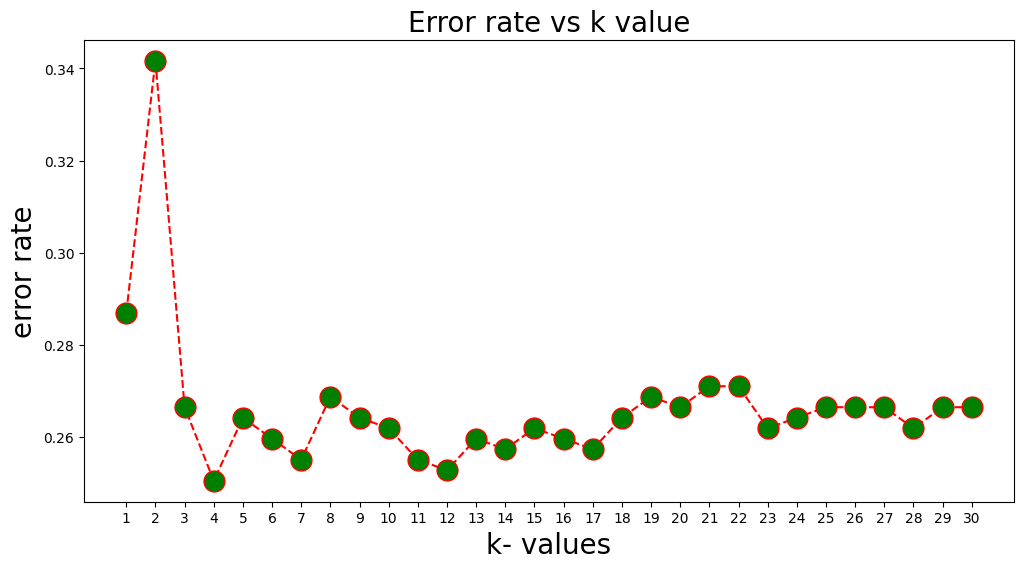

In [29]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    predict_i=clf.predict(x_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

###### As we see in above figure after k=12 the fluctuation in error rate is not much . Hence I have chosen k=12 for modeling the dataset.

#### After applying best fit k value

In [30]:
# create K nearest neighbors body
knn_best_fit_k = KNeighborsClassifier(n_neighbors= 4)

#Train the model using .fit method
knn_best_fit_k.fit(x_train, y_train)

# print the accuracy
print("KNN _best_fit_k accuracy:{:,.2f}%".format(knn.score(x_test,y_test)*100))

KNN _best_fit_k accuracy:73.58%


###### There can not seen a significant increment in the accuracy.

### 7.Gradient Boosting(XGBoost)

In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

#Train the model using .fit method
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:81.32%


### 8.Gradient Boosting(AdaBoost)

In [32]:
from sklearn.ensemble import AdaBoostClassifier

AdaB = AdaBoostClassifier()

#Train the model using .fit method
AdaB.fit(x_train,y_train)
print("AdaB Accuracy:{:.2f}%".format(AdaB.score(x_test,y_test)*100))

AdaB Accuracy:79.50%


###### I achieved highest accuracy on Random forest Algorithm. so I am going to use it as the model.

### Improve the Model

In [33]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

# define parameters
parameters = {
    'n_estimators': [10, 50, 100],
    'criterion':['gini', 'entropy', 'log_loss']
}


grid_search = GridSearchCV(rf, param_grid=parameters)

#Train the model for the given parameter values
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [10, 50, 100]})

In [34]:
# check the best parametes which will give the high accuracy of the model

grid_search.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [35]:
#check the model accuracy with new parameter values

grid_search.score(x_test,y_test)

0.8291571753986332

### Save the Machine Learning Model

 ###### We can use the pickle operation to serialize our machine learning algorithms and save the serialized format to a file.
 
 ###### Later we can load this file to deserialize our model and use it to make new predictions.

 ###### Pickle is one of the python standard libraries for object serialization/deserialization. Pickle serialization saves objects into a file in byte format while deserialization is the reverse of serialization. While trying to serialize an object into a pickle file, it is necessary to state the byte/binary format first otherwise, you will run into an error. Several objects such as lists, tuples, dictionaries, transformers, models, and many others can be pickled/serialized however, this article focuses on serializing and deserializing Machine Learning models.

##### Working with Pickle: Model Serialization

In [36]:
#import pickle library
import pickle

###### After importing the pickle library with the style of your choice, it’s time to open/create a file and dump the object into the file. 
###### While opening the file, it is necessary to specify the text modes which are write (w) and binary mode (b) for serializing operations. 

In [37]:
# Saving model to pickle file
with open("finalized_model.pkl", "wb") as file: # file is a variable for storing the newly created file, it can be anything.
    pickle.dump(rf, file) # Dump function is used to write the object into the created file in byte format.
 


##### Working with Pickle: Model Deserialization

###### Deserialization, the reverse of the serialization process. In order to deserialize a file, it is also necessary to specify the text modes which are read (r) and binary mode (b) for deserialization operations. The read mode tells the compiler that the file is already in existence and all that needs to be done is to read in the binary text and convert it back to the original object.

In [38]:
# load the model from disk
rf_model = pickle.load(open("finalized_model.pkl", 'rb'))


In [39]:
#use of saved model
result = rf_model.score(x_test, y_test)
print(result)

0.826879271070615


### Testing User Input

In [40]:
# Take user input for precipitation, temp_max, temp_min, and wind
precipitation = float(input("Enter the precipitation: "))
temp_max = float(input("Enter the maximum temperature: "))
temp_min = float(input("Enter the minimum temperature: "))
wind = float(input("Enter the wind speed: "))

# Create a list with the user input data
input_data = [[precipitation, temp_max, temp_min, wind]]

# Make the prediction using the trained Naive Bayes classifier
ot = rf_model.predict(input_data)

# Print the predicted weather condition
print("The weather is:")

if ot == 0:
    print("Drizzle")
elif ot == 1:
    print("Fog")
elif ot == 2:
    print("Rain")
elif ot == 3:
    print("Snow")

The weather is:
Rain


c:\Users\kalanis\Anaconda3\envs\Weather_forcast_EDA\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
